# 1. Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

# 2. Mounting Drive to access the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. Reading data and converting it into a dataframe

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Prottoy/Chronic Disease Prediction.csv')
df.head()

,Person,Name,Gender,Age,Height,Weight,BMI,Heart Rate,Temparature,SPO2,Motion,ECG Graph,ECG Min,Condition
0,1,NaN,Male,32,174,96,31.708284,67,100,0.99,1,0,NaN,Normal
1,2,NaN,Male,38,189,87,24.355421,100,102,0.91,1,1,NaN,Covid
2,3,NaN,Female,45,185,110,32.140248,94,97,0.93,1,0,NaN,tachycardia
3,4,NaN,Female,60,195,104,27.350427,69,99,1.00,1,0,NaN,Fever
4,5,NaN,Male,41,149,61,27.476240,115,105,0.97,1,0,NaN,Fever


# 4.1 Preprocessing: Dropping Unused Column

In [ ]:
df=df.drop("Name", axis=1)
df=df.drop("Person", axis=1)
df=df.drop("ECG Min", axis=1)

df

,Gender,Age,Height,Weight,BMI,Heart Rate,Temparature,SPO2,Motion,ECG Graph,Condition
0,Male,32,174,96,31.708284,67,100,0.99,1,0,Normal
1,Male,38,189,87,24.355421,100,102,0.91,1,1,Covid
2,Female,45,185,110,32.140248,94,97,0.93,1,0,tachycardia
3,Female,60,195,104,27.350427,69,99,1.00,1,0,Fever
4,Male,41,149,61,27.476240,115,105,0.97,1,0,Fever
...,...,...,...,...,...,...,...,...,...,...,...
295,Female,37,154,91,36.026175,72,99,0.99,1,0,Normal
296,Male,25,146,87,44.033889,73,96,0.94,1,0,Normal
297,Male,41,191,58,26.802226,98,99,0.92,1,0,Normal
298,Male,27,192,106,31.114526,84,97,0.93,0,0,Normal


# 5. Data Visualization

<Axes: >

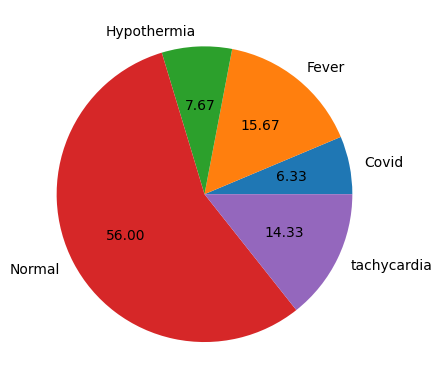

In [ ]:
df.groupby('Condition').size().plot(kind='pie', autopct='%.2f', y=None)

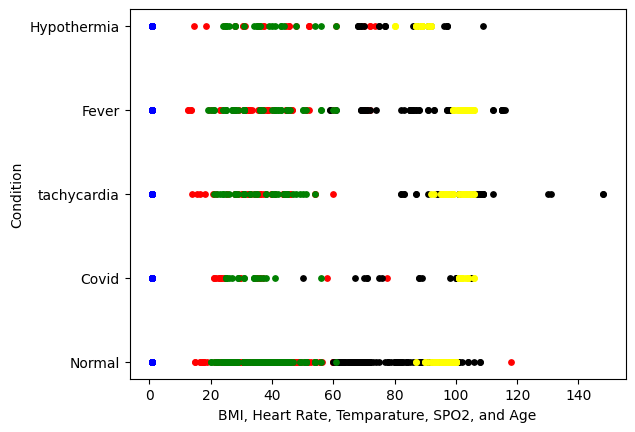

In [ ]:
plt.xlabel("BMI, Heart Rate, Temparature, SPO2, and Age")
plt.ylabel("Condition")

plt.scatter(df["BMI"],df["Condition"],c="red", s=15)
plt.scatter(df["Heart Rate"],df["Condition"],c="black", s=15)
plt.scatter(df["Temparature"],df["Condition"],c="yellow", s=15)
plt.scatter(df["SPO2"],df["Condition"],c="blue", s=15)
plt.scatter(df["Age"],df["Condition"],c="green", s=15)

# 4.2 Encoding Categorical Variables using Ordinal Encoder

In [ ]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()

df = MultiColumnLabelEncoder(columns = df.columns).fit_transform(df)
df= df.apply(LabelEncoder().fit_transform)

In [ ]:
df

,Gender,Age,Height,Weight,BMI,Heart Rate,Temparature,SPO2,Motion,ECG Graph,Condition
0,1,12,33,38,80,9,14,9,1,0,3
1,1,18,47,29,34,42,16,1,1,1,0
2,0,25,43,52,84,36,11,3,1,0,4
3,0,34,53,46,47,11,13,10,1,0,1
4,1,21,8,7,49,52,19,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
295,0,17,13,33,110,14,13,9,1,0,3
296,1,6,6,29,148,15,10,4,1,0,3
297,1,21,49,5,42,40,13,2,1,0,3
298,1,8,50,48,76,26,11,3,0,0,3


# 6. Training Data: Train-Test Split

In [ ]:
y = df['Condition']
X = df[df.columns]
X = X.drop(['Condition'], axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=100)

In [ ]:
X

,Gender,Age,Height,Weight,BMI,Heart Rate,Temparature,SPO2,Motion,ECG Graph
0,1,12,33,38,80,9,14,9,1,0
1,1,18,47,29,34,42,16,1,1,1
2,0,25,43,52,84,36,11,3,1,0
3,0,34,53,46,47,11,13,10,1,0
4,1,21,8,7,49,52,19,7,1,0
...,...,...,...,...,...,...,...,...,...,...
295,0,17,13,33,110,14,13,9,1,0
296,1,6,6,29,148,15,10,4,1,0
297,1,21,49,5,42,40,13,2,1,0
298,1,8,50,48,76,26,11,3,0,0


In [ ]:
y

0      3
1      0
2      4
3      1
4      1
      ..
295    3
296    3
297    3
298    3
299    3
Name: Condition, Length: 300, dtype: int64

# 7. Feature Selection

In [ ]:
from sklearn.feature_selection import mutual_info_regression
# determining the mutual information
mutual_info = mutual_info_regression(X_train.fillna(0), y_train)
mutual_info

array([0.        , 0.        , 0.00595119, 0.0479984 , 0.        ,
       0.24717618, 0.54525963, 0.20864824, 0.        , 0.23053595])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

#This shows that temperature, heart rate and SPO2 are the most important factors in our training

Temparature    0.545260
Heart Rate     0.247176
ECG Graph      0.230536
SPO2           0.208648
Weight         0.047998
Height         0.005951
Gender         0.000000
Age            0.000000
BMI            0.000000
Motion         0.000000
dtype: float64

# 8.1 ML Model: Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(**{"max_features": 0.3, "n_estimators":100,"min_samples_leaf": 0.01,"random_state":50},oob_score= True)
rf.fit(X, y)
y_pred_test = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [ ]:
from sklearn import metrics 
from sklearn.metrics import r2_score
from sklearn.metrics import precision_recall_fscore_support

print("TRAINING ACCURACY OF THE Random-Forest Classifier: ", metrics.accuracy_score(y_train, y_pred_train)*100,"%")
print("TESTING ACCURACY OF THE Random-Forest Classifier: ", metrics.accuracy_score(y_test, y_pred_test)*100,"%")

from yellowbrick.classifier import ROCAUC
print("Out of Bag Score in RandomForest: ",rf.oob_score_)

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred_test, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred_test, average='micro'))

print(precision_recall_fscore_support(y_test, y_pred_test, average='macro'))

TRAINING ACCURACY OF THE Random-Forest Classifier:  96.66666666666667 %
TESTING ACCURACY OF THE Random-Forest Classifier:  96.66666666666667 %
Out of Bag Score in RandomForest:  0.9
Precision: 0.9666666666666667
Recall: 0.9666666666666667
(0.9898305084745763, 0.9478991596638655, 0.9668979933110368, None)


# 8.2 ML Model:  K-Nearest Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knnclassifier = KNeighborsClassifier(n_neighbors=7)
knnclassifier.fit(X_train,y_train)
y_pred = knnclassifier.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
print("Cross validation Score:", cross_val_score(knnclassifier, X, y, cv=2, scoring ='accuracy'))

print("Accuracy Score:", metrics.accuracy_score(y_test,y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))
print(precision_recall_fscore_support(y_test, y_pred, average='macro'))

Cross validation Score: [0.6        0.57333333]
Accuracy Score: 0.6666666666666666
Precision: 0.6666666666666666
Recall: 0.6666666666666666
(0.4632835820895522, 0.41949579831932765, 0.43210895698700574, None)


# 8.3 Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=100)
dt = dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [ ]:
print('R2 Score of THE Decision-Tree MODEL: ', r2_score(y_test, y_pred)*100)

print("Cross validation Score:", cross_val_score(dt, X, y, cv=2, scoring ='accuracy').mean())

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred, average='micro'))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred, average='micro'))

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))


R2 Score of THE Decision-Tree MODEL:  70.13604689746708
Cross validation Score: 0.88
Precision: 0.8888888888888888
Recall: 0.8888888888888888
(0.8725499092558984, 0.7157563025210084, 0.7572681704260651, None)
